In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Iris.csv')

# Use LabelEncoder to encode the 'Species' column
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

# Print the modified dataset
print(data.head())

# Separate features and target variable
X = data.drop('Species', axis=1)
y = data['Species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Finding the best K value
neighbors = list(range(1, 41))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring="accuracy")
    cv_scores.append(scores.mean())

mse = [1 - x for x in cv_scores]
best_k = neighbors[mse.index(min(mse))]
print(f"The best value of k is: {best_k}")

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0
The best value of k is: 1


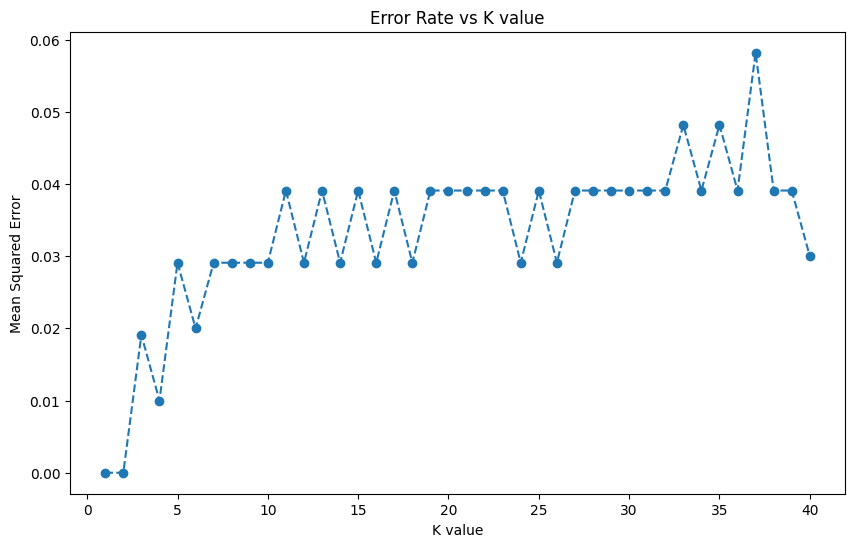

In [7]:
mse = [1- x for x in cv_scores]
plt.figure(figsize=(10,6))
plt.plot(neighbors, mse, marker='o', linestyle='dashed')
plt.xlabel('K value')
plt.ylabel('Mean Squared Error')
plt.title('Error Rate vs K value')
plt.show()
# visualizing erros vs K value

In [8]:
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

